In [65]:
from datascience import *
import numpy as np
%matplotlib inline

In [64]:
babies = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week7/baby.csv')
def test_statistic(table, group, value, fun):
    tbl = table.select(group, value)
    group = tbl.group(group, fun)
    return group.column(1).item(1) - group.column(1).item(0)

test_statistic(babies, "Maternal Smoker", "Birth Weight", np.average)

-9.266142572024918

In [3]:
bta = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week8/bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [14]:
observed = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week8/observed_outcomes.csv')
observed.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


In [87]:
sf = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week8/san_francisco_2015.csv')
sf.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [63]:
bta.group(0, np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [66]:
test_statistic(bta, 0,1, np.average)

0.475

In [68]:
sample_bta = bta.with_column("Permuted",bta.sample(with_replacement=False).column(1))
sample_bta

Group,Result,Permuted
Control,1,1
Control,1,0
Control,0,1
Control,0,1
Control,0,0
Control,0,0
Control,0,0
Control,0,1
Control,0,1
Control,0,1


In [69]:
test_statistic(sample_bta,0, "Permuted",np.average)

-0.17083333333333334

In [73]:
def compute_statistic(table, group, value, fun):
    sample = table.with_column("Permuted",table.sample(with_replacement=False).column(value))
    return test_statistic(sample, group, "Permuted", fun)
compute_statistic(bta, 0, 1, np.average)

-0.041666666666666685

In [85]:
def simulate_p_value(table, group, value, fun, repetitions):
    statistics = make_array()
    empirical_value = test_statistic(table,0,1,np.average)
    for i in np.arange(repetitions):
        statistics = np.append(statistics,compute_statistic(bta, 0, 1, np.average))
    return sum(statistics >= empirical_value)/repetitions

In [86]:
simulate_p_value(bta, 0,1,np.average,1000)

0.01

In [78]:
empirical_value = test_statistic(bta,0, 1,np.average)
empirical_value

0.475

In [80]:
sum(statistics >= empirical_value)/repetitions

0.005

In [88]:
sf.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [89]:
percentile(50, sf.column("Total Compensation"))

98174.9

In [93]:
sf.sort("Total Compensation", descending=False).show(15)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1044,IS Engineer-Principal,28988,0,0,0,0,0,0,-3.1,-3.1,-3.1
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,19125,0,0,0,0,0,0,-0.01,-0.01,-0.01
Calendar,2015,1,Public Protection,ECD,Department of Emergency Management,351,Municipal Executive Association - Miscellaneous,0900,Management,0922,Manager I,30025,0,0,0,0,0,0,0,0,0
Calendar,2015,7,General City Responsibilities,UNA,General Fund Unallocated,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3280,Assistant Recreation Director,49784,0,0,0,0,0,0,1.27,1.27,1.27
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2600,Dietary & Food,2654,Cook,26768,0,0,2.21,2.21,0,0,0.17,0.17,2.38


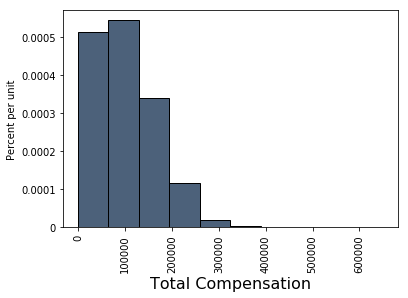

In [90]:
sf.hist("Total Compensation", bins=np.ara)

In [96]:
sf_norm = sf.where("Total Compensation", are.above(11*20*52))

In [97]:
sf_norm.sort("Total Compensation")

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,42943,10542.6,0,67.44,10610,0,0,839.16,839.16,11449.2
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1600,"Payroll, Billing & Accounting",1652,Accountant II,45134,7851.34,0,0,7851.34,1761.05,1209.9,632.92,3603.87,11455.2
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,9900,Public Service Aide,9916,Public Svc Aide-Public Works,16738,7607.35,0,0,7607.35,0,3237.54,613.34,3850.88,11458.2
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,25519,6343.8,61.19,1057.31,7462.3,3264.43,502.12,237.45,4004,11466.3
Calendar,2015,1,Public Protection,ECD,Department of Emergency Management,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8239,Public Safetycomm Supv,43214,8043.41,0,0,8043.41,1804.14,954.24,666.04,3424.42,11467.8
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,216,"Teamsters, Local 853",7300,Journeyman Trade,7355,Truck Driver,13439,8790.92,0,166.38,8957.3,1815.02,4.29,693.48,2512.79,11470.1
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9910,Public Service Trainee,42329,7585.33,0,0,7585.33,0,3267.41,619.11,3886.52,11471.9
Calendar,2015,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3208,Pool Lifeguard,52370,8130.74,0,22.48,8153.22,0,2688,632.47,3320.47,11473.7
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,32648,6986.79,1702.55,682.87,9372.21,0,1389.46,718.3,2107.76,11480
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9922,PS Aide To Prof,11673,8357.72,0,0,8357.72,0,2477.43,648.69,3126.12,11483.8


In [99]:
percentile(50,sf_norm.column("Total Compensation"))

108200.83

In [105]:
sample = sf_norm.sample(200,with_replacement=False)
percentile(50,sample.column("Total Compensation"))

108840.63

In [106]:
repetitions = 100
statistics = make_array()
for i in np.arange(repetitions):
    sample = sf_norm.sample(200,with_replacement=False)
    statistics = np.append(statistics,percentile(50,sample.column("Total Compensation")))

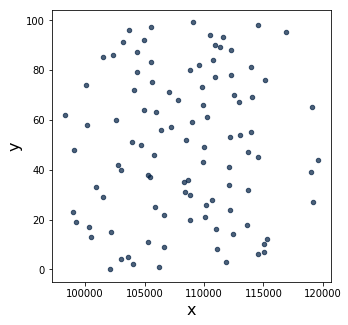

In [107]:
Table().with_column("x", statistics).with_column("y", np.arange(100)).scatter("x")

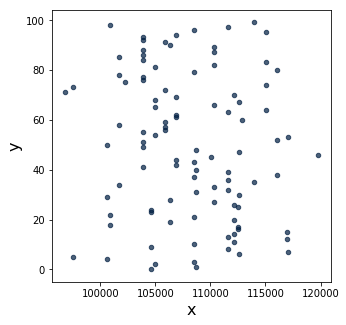

In [115]:
Table().with_column("x", statistics).with_column("y", np.arange(100)).scatter("x")